# CN4 - Décomposition de l'eau oxygénée

> **L'objectif de ce TD est déterminer l'évolution de la température lors de la décomposition de l'eau oxygénée.**
>
>
> *Vous devez :*
> - rédiger les questions théoriques (T1, T2...) sur une copie que vous rendrez à votre enseignant.
> - exécuter les cellules de code déjà écrites sur ce document, et compléter celles correspondant aux questions "informatique" (Q1, Q2...).
> - enregistrer votre Notebook au format : *CN4_votrenom_votreprenom.ipynb* et le transmettre à votre enseignant via cahier-de-prepa.


On s'intéresse ici à la décomposition spontanée de l'eau oxygénée, en solution aqueuse :

$$H_2O_{2(aq)}=H_2O_{(l)}+\frac{1}{2} O_{2(g)}$$

Cette équation possède une cinétique d'ordre 1 par rapport au peroxyde d'hydrogène.

Initialement, on place $n_0$ de peroxyde d'hydrogène $H_2O_2$ dans une masse $m$ d'eau de volume $V$. Le tout est placé dans un calorimètre, de capacité thermique supposée nulle, à la température initiale de $T_0=298K$.

L'objectif de ce TP est de coupler les descriptions cinétiques et thermodynamiques de cette décomposition afin de prédire l'évolution de la température du système au cours du temps.

On utilisera par la suite les données et modules Python suivants :

In [3]:
#Cellule à exécuter

# Modules Python utiles

import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Données, toutes en unités du système international

R=8.314 # Constante des gaz parfaits
drH0=-94.6e3 # Enthalpie standard de la réaction
Ea=72.4e3 # Energie d'activation
A=1.3e11/60 # Facteur cinétique pré-exponentiel
ce=4.18e3 # Capacité thermique massique de l'eau liquide
m=1 # Masse d'eau
T0=298 # Température initiale
n0=0.2
V=1e-3 # Volume de solution (en m3)
c0=n0/V # Concentration initiale de peroxyde d'hydrogène (en mol/m3)

## Etude cinétique

> **Question T1 :**
>
> Ecrire la loi de vitesse associée à la réaction et en déduire que l'équation différentielle vérifiée par l'avancement $\xi$ de la réaction est :



$$
\frac{d\xi}{dt}+k \xi=k n_0  \mbox{ (1)}
$$


> ***Corrigé :***
>
> *On pose $c=[H_2O_2]$.*
>
> *$v=kc$ et $v=-\frac{dc}{dt}$ donnent*
> $$\frac{dc}{dt}+kc=0$$
>
> *Un tableau d'avancement donne : $\xi=(c_0-c)\times V$* et donc :
>$$\frac{d\xi}{dt}=k.(n_0-\xi)$$
>

>**Question T2 :** 
>
> Au vu des données et de l'expérience présentée, que peut-on supposer sur la température du mileu réactionnel au cours de l'expérience ? Expliquer alors pourquoi la résolution de l'équation (1) obtenue à la question précédente devient délicate.

> ***Corrigé :***
>
>*Le valeur de $\Delta_rH^0$ est négative, ce qui traduit le caractère exothermique de la réaction. Celle-ci s'effectuant dans une enceinte adiabatique, l'impossibilité d'un transfert thermique vers l'extérieur va se traduire par une augmentation de température du milieu réactionnel au cours du temps.*
>
>*La constante de vitesse $k$ dépend de la température par la loi d'Arrhénius. Comme cette température va évoluer au cours du temps, l'équation différentielle précédente est une équation différentielle d'ordre 1 à coefficient non constant (et non explicite car on ne connaît pas l'évolution de $T(t)$ et donc de $k(t)$ a priori).*


>**Question T3 :** 
>
> Rappeler la relation (2) reliant la constante de vitesse $k$ à la Température.

>***Corrigé :***
>
>La loi d'Arrhénius donne :
$$k(T)=A \exp\left(-\frac{E_a}{RT}\right)  \mbox{ (2)}$$


>**Question Q1 :** 
>
> Compléter la fonction suivante qui retourne la valeur de $k$ en fonction de la température passée en argument.

In [ ]:
def k(T):
    ### A COMPLETER
    
    

In [4]:
## Corrigé

def k(T):
    return A*np.exp(-Ea/(R*T))

# J'utilise ici la fonction exp du module 'numpy' pour simplifier quelques tracés à la fin. 
# Mais on peut aussi utiliser exp du module 'math'.

## Etude thermodynamique 

Les paramètres qui évoluent au cours du temps et qui décrivent le problème sont donc :
- la température $T(t)$
- la constante de vitesse $k(T)$
- l'avancement de la réaction $\xi(t)$

Nous disposons par ailleurs :
- de la relation (1) qui relie $\xi$ et $k$
- de la relation (2) qui relie $k$ et $T$

Il manque une troisième relation entre les paramètres pour décrire complètement le système. 

>**Question T4 :** 
>
>Par une étude thermodynamique, en effectuant un bilan enthalpique entre l'instant initial et l'instant $t$, montrer que la relation (3) entre $T(t)$ et $\xi(t)$ s'écrit :
>$$T(t)=T_0 - \frac{\Delta_r H^0}{m c_e} \xi(t) \mbox{ (3)}$$
>*On soignera particulièrement la rédaction de cette démonstration.*

>**Question Q2 :**
>
>Compléter la fonction ci-dessous qui retourne la température à partir de la valeur de l'avancement passé en argument.

In [ ]:
def T(xi):
    #### A COMPLETER

In [5]:
#Corrigé 

def T(xi):
    return T0-drH0/(m*ce)*xi

## Dynamique du système

Nous disposons désormais de toutes les relations pour étudier la dynamique du système. De proche en proche, nous allons calculer la température à tout instant, en suivant le schéma suivant :

<img src="https://simon-laurette.github.io/CN4_Thermochimie/syno.png" width=800></img>

>**Question Q3 :** 
>
> Compléter la fonction `f(T,xi)` suivante définie par :
> $$ \frac{d\xi}{dt}=f(T,\xi)$$



In [ ]:
def f(T,xi):
    ''' telle que dxi/dt=f(T,xi)'''
    ### A COMPLETER


In [6]:
# Corrigé

def f(T,xi):
    ''' telle que dxi/dt=f(T,xi)'''
    return k(T)*(c0*V-xi)


>**Question Q4 :** 
>
> Mettre en oeuvre la méthode décrite sur le schéma pour déterminer l'évolution de la température à tout instant. On complètera le code proposé ci-dessous. En déduire le tracé de la température au cours du temps.

In [ ]:
# On stocke les valeurs de t, T et xi à chaque instant dans 3 listes : l_t, l_T et l_xi
# Ces listes sont initialisées ci-dessous.

l_t=[0] # liste des temps en s
l_T=[T0] # liste des T en K
l_xi=[0] # liste des xi en mol

# Paramètres de la simulation

dt=1 # pas de calcul temporel
Tf=10000 # instant final de calcul

for i in range(int(Tf/dt)):
    ### A COMPLETER
    ###
    ###
    ###
  





plt.figure()
plt.plot(np.array(l_t)/60,l_T)
plt.xlabel("t en minutes")
plt.ylabel("T en °C")
plt.legend()
plt.grid()
plt.show()    
    

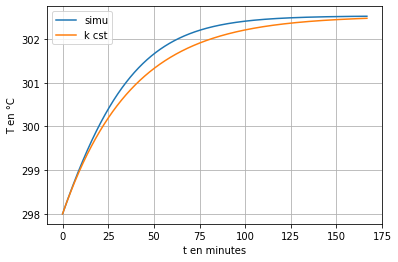

In [8]:
# Corrigé

# On stocke les valeurs de t, T et xi à chaque instant dans 3 listes : l_t, l_T et l_xi
# Ces listes sont initialisées ci-dessous.

l_t=[0]
l_T=[T0]
l_xi=[0]

# Paramètres de la simulation

dt=1 # pas de calcul temporel
Tf=10000 # instant final de calcul

for i in range(int(Tf/dt)):
    new_xi=l_xi[-1]+dt*f(l_T[-1],l_xi[-1])
    l_xi.append(new_xi)
    l_T.append(T(new_xi))
    l_t.append(l_t[-1]+dt)
  

## Pour info, ce que l'on aurait obtenu si la constante de vitesse était indépendante de T
k1=k(T0)
xi_th=c0*V*(1-np.exp(-k1*np.array(l_t)))
T_th=T(xi_th)

## On compare les deux
plt.figure()
plt.plot(np.array(l_t)/60,np.array(l_T), label="simu")
plt.plot(np.array(l_t)/60, T_th, label="k cst")
plt.xlabel("t en minutes")
plt.ylabel("T en °C")
plt.legend()
plt.grid()
plt.show()
    
    